# Machine learning exercise 3
## Neural networks
### Loading MNIST data

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_mldata  #fetches data from mldata.org

mnist = fetch_mldata('MNIST original', data_home='ex3/')

In [2]:
mnist.data.shape

(70000, 784)

In [3]:
mnist.target.shape

(70000,)

In [4]:
mnist.data[6000].shape

(784,)

(-0.5, 27.5, 27.5, -0.5)

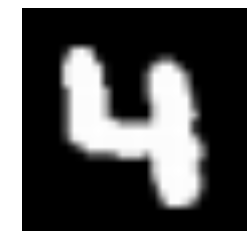

In [5]:
plt.figure()
plt.imshow(mnist.data[65001].reshape(28,28), cmap=plt.cm.gray)
plt.axis('off')
plt.show()

### Make a 10 x 10 array of random MNIST samples

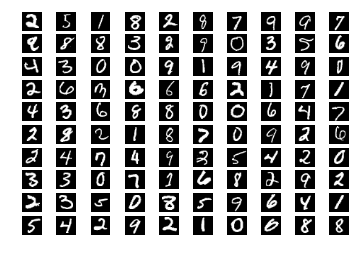

In [9]:
locations = np.random.randint(0,70000, size=100)

# Gridspec can be used to make this snazzier (remove whitespace)
plt.figure()
for i in range(locations.size):
    plt.subplot(10,10,i+1)
    plt.imshow(mnist.data[locations[i]].reshape(28,28), cmap=plt.cm.gray)
    plt.axis('off')
    
plt.show()

### Vectorize the logistic cost function

If our data has $n$ features and $m$ examples, a matrix $X$ with $m$ rows and $n+1$ columns is created (with all elements of the first column equal to 1.  Multiplying this vector by the vector of features $\theta$ gives the value of $z$ for each example, where 

\begin{align}
g(z) &= \frac{1}{1 + e^{-z}}
\end{align}

is the logistic function.  numpy.exp and numpy.log will allow for these operations to be done elementwise easily, and hence vectorize the cost function,

\begin{align}
J(\theta) &= -\frac{1}{m}\sum_i^m \left[y^{(i)} \log(h(x^{(i)})) + (1 - y^{(i)}) \log (1 - h(x^{(i)})) \right].
\end{align}

In [10]:
def sigmoid(z):
    """Computes the sigmoid function elementwise on a vector z"""
    
    return 1/(1 + np.exp(-z))

def compute_cost(data, target, theta, regularization):
    """Takes an (m_examples x n_features) data matrix (with no column of 1s appended yet), an m_examples
    length target vector, an n_features length vector of parameters, and a coefficient for the regularization
    term, which penalizes parameters which are too large"""
    
    X = np.column_stack((np.ones(target.size), data))
    z = np.dot(X, theta)
    g = sigmoid(z)
    cost_vector = target * np.log(g) + (1 - target) * np.log(1 - g)
    cost = -np.mean(cost_vector) + (regularization/2) * np.mean(theta[1:]**2) 
    # mean will (or should, I haven't checked) sum and divide by m
    return cost    

### Vectorize the gradient for logistic regression

The gradient for the above cost function is 

\begin{align}
\frac{\partial J}{\partial \theta_j} &= \frac{1}{m} \sum_i^m \left(h(x^{(i)}) - y^{(i)} \right)x_j^{(i)},
\end{align}

which can be computed by multiplying $X^T (h(x) - y)$, where the part in parenthesis is a vector of the hypothesis minus the target for each example as the components.

In [ ]:
def compute_gradient(data, target, theta, regularization):
    """Takes an (m_examples x n_features data matrix, an m_examples length target vector, an n_features
    length vector of parameters, and the regularization parameter and outputs an n_features length vector 
    of partial derivatives"""
    X = np.column_stack((np.ones(target.size), data))
    z = np.dot(X, theta)
    g = sigmoid(z)
    residual_vector = g - target
    theta_temp = theta.copy()
    theta_temp[0] = 0
    gradient_vector = np.dot(X.transpose(), residual_vector) + (regularization/target.size)*theta_temp
    return gradient_vector    